# importando as bibliotecas

In [6]:
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

import torch
import torchvision
from torchvision import datasets, transforms

# importando o dataset mnist para problemas de classificação

In [7]:
# Dados de teste
mnist = torchvision.datasets.MNIST('.',
                           train=False, ## True se o dado for de treino
                           transform= transforms.ToTensor(),
                           download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



In [15]:
# Chanel Fist: Padrao do Pytorch
dado, rotulo = mnist[0]
print(type(dado), type(rotulo))
print(dado.size(), rotulo)

# torch.Size([1, 28, 28]) 7 -> o 1, siginifica que tem apenas 1 canal de cor, ou seja, preto e branco

<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 28, 28]) 7


## plot das amostras do dataset

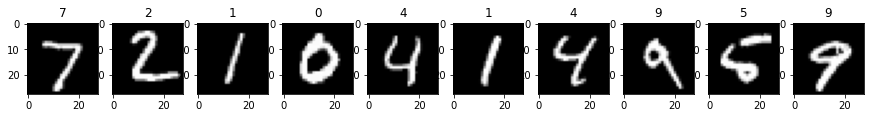

In [23]:
fig, axs = plt.subplots(1, 10, figsize=(15,4))

for i in range(10):
    dado, rotulo = mnist[i]    
    axs[i].imshow(dado[0], cmap='gray')
    axs[i].set_title(str(rotulo))    

# carregando os dados para problemas de regressão/detecçao

In [26]:
voc = torchvision.datasets.VOCDetection('.',
                                           image_set='train',
                                           download=True,
                                           transform= transforms.ToTensor(),
                                           )

  0%|          | 0/1999639040 [00:00<?, ?it/s]

Extracting .\VOCtrainval_11-May-2012.tar to .


## visualizando o dado e tambem o boundurybox(bndbox)

<class 'torch.Tensor'> <class 'dict'>
torch.Size([3, 442, 500])


{'annotation': {'folder': 'VOC2012',
  'filename': '2008_000008.jpg',
  'source': {'database': 'The VOC2008 Database',
   'annotation': 'PASCAL VOC2008',
   'image': 'flickr'},
  'size': {'width': '500', 'height': '442', 'depth': '3'},
  'segmented': '0',
  'object': [{'name': 'horse',
    'pose': 'Left',
    'truncated': '0',
    'occluded': '1',
    'bndbox': {'xmin': '53', 'ymin': '87', 'xmax': '471', 'ymax': '420'},
    'difficult': '0'},
   {'name': 'person',
    'pose': 'Unspecified',
    'truncated': '1',
    'occluded': '0',
    'bndbox': {'xmin': '158', 'ymin': '44', 'xmax': '289', 'ymax': '167'},
    'difficult': '0'}]}}

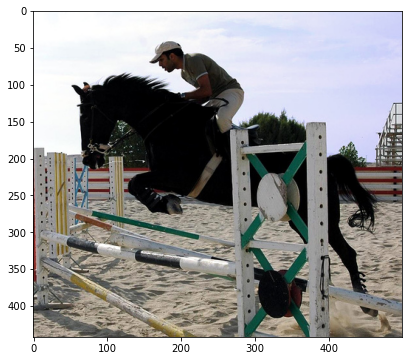

In [30]:
dado, rotulo = voc[0]

print(type(dado), type(rotulo))
print(dado.size())

dado = dado.permute(1, 2, 0)
plt.figure(figsize=(8, 6))
plt.imshow(dado)

rotulo

## plotando a imagem com o bndbox visivel

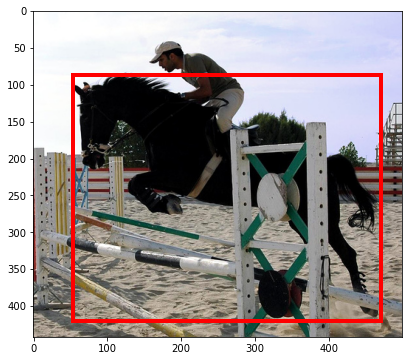

In [36]:
bbox = rotulo['annotation']['object'][0]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(dado)

w, h = xmax-xmin, ymax-ymin
rect = patches.Rectangle((xmin, ymin), w, h, fill=False, color='r', linewidth=4)
ax.add_patch(rect)
plt.show()

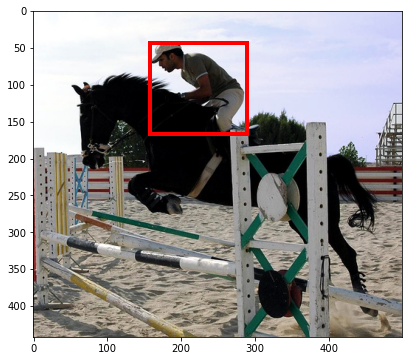

In [37]:
bbox = rotulo['annotation']['object'][1]['bndbox']
xmax = int(bbox['xmax'])
xmin = int(bbox['xmin'])
ymax = int(bbox['ymax'])
ymin = int(bbox['ymin'])

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(dado)

w, h = xmax-xmin, ymax-ymin
rect = patches.Rectangle((xmin, ymin), w, h, fill=False, color='r', linewidth=4)
ax.add_patch(rect)
plt.show()

# carregando os dados para problemas de segmentação

In [43]:
vocs = torchvision.datasets.VOCSegmentation('.',
                                           image_set='val',
                                           download=True,
                                           transform= transforms.ToTensor(),
                                           target_transform= transforms.ToTensor()
                                           )

Using downloaded and verified file: .\VOCtrainval_11-May-2012.tar
Extracting .\VOCtrainval_11-May-2012.tar to .


<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([3, 366, 500]) torch.Size([1, 366, 500])


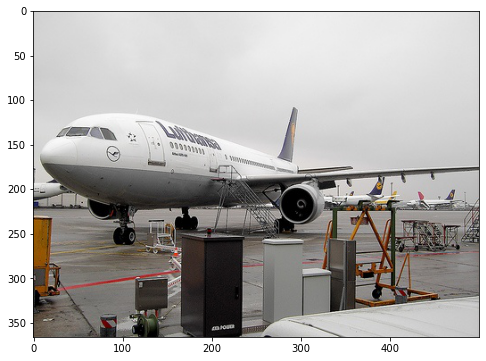

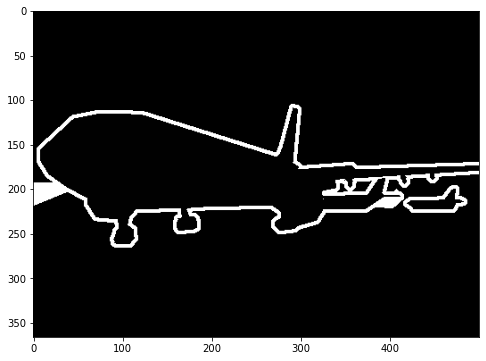

In [52]:
dado, rotulo = vocs[0]

print(type(dado), type(rotulo))
print(dado.size(), rotulo.size())

dado = dado.permute(1, 2, 0)

plt.figure(figsize=(8, 6))
plt.imshow(dado)

plt.figure(figsize=(8, 6))
plt.imshow(rotulo[0], cmap='gray')

### para resolver o problema de segmentação, no final da rede ao inves de usar o MLP é usado outra rede covulacional

# importando e visulizando outro dataset (CIFAR)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
<class 'torch.Tensor'> <class 'int'>
torch.Size([3, 32, 32])


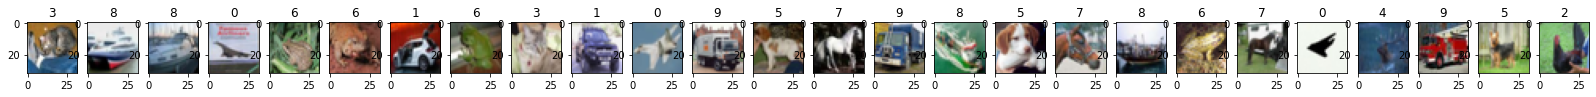

In [53]:
data = datasets.CIFAR10('./',
                      train=False,
                      download=True,
                      transform=transforms.ToTensor())


dado, rotulo = data[0]
print(type(dado), type(rotulo))

# Channel First: Padrão do torch
print(dado.size()) # C x H x W

fig, axs = plt.subplots(1,26, figsize=(28, 4))

for i in range(26):
    dado, rotulo = data[i]
    # Lembre-se que imagens são carregadas na dimensão C x H x W
    # é preciso permutar as dimensões para plot.
    axs[i].imshow(dado.permute(1,2,0))
    axs[i].set_title(str(rotulo))

plt.show()